<a href="https://colab.research.google.com/github/hosseinimasuod/Classification-using-CNN/blob/main/Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN in TensorFlow
## Project Overview

A Convolutional Neural Network (CNN) has been developed using Keras, inspired by the VGG-16 architecture but designed with fewer layers to match the complexity of the CIFAR-10 dataset. The objective was to construct a robust image classification model capable of distinguishing between 10 categories of 32x32 color images. To enhance the model's generalization, a Dropout layer has been incorporated to mitigate the effects of overfitting.


In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [2]:
SEED_VALUE = 37

random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

## Dataset Summary

The CIFAR-10 dataset is composed of 60,000 color images categorized into 10 distinct classes, with each class containing 6,000 images.
The dataset has been divided into:
- 50,000 training samples
- 10,000 test samples

The 10 image classes in CIFAR-10 are:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

In below, some sample images from the Dataset has been shown.

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


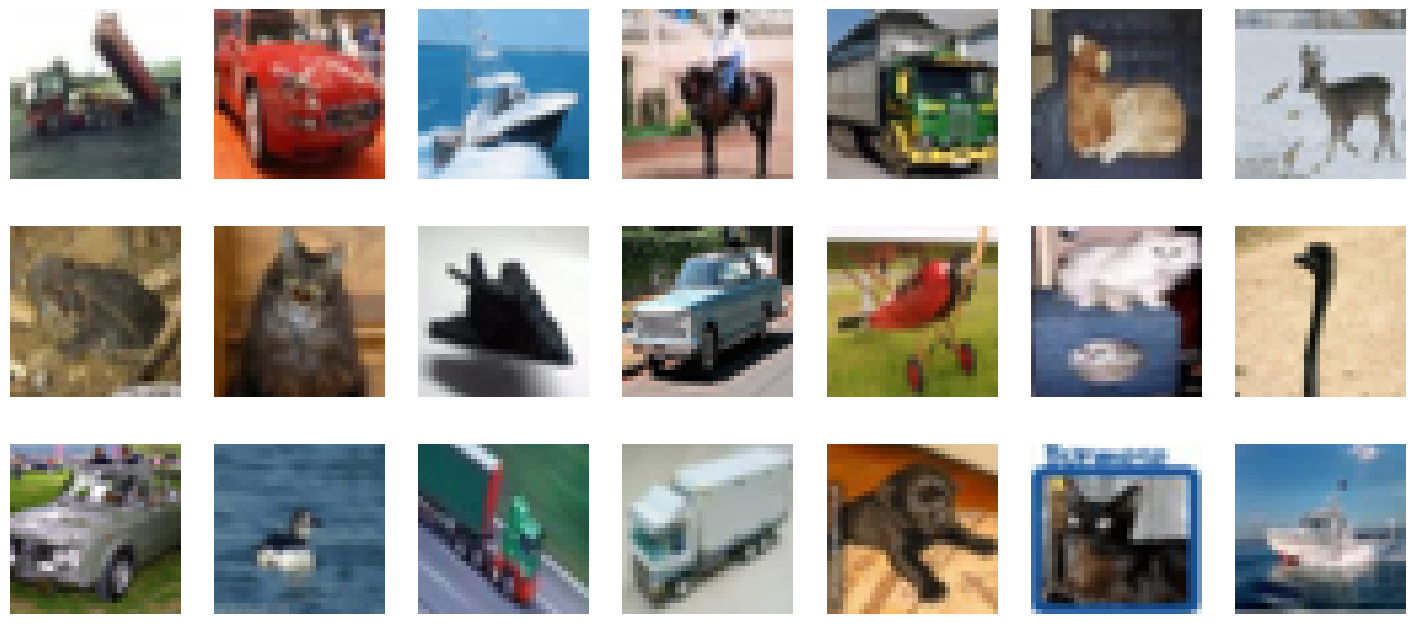

In [5]:
plt.figure(figsize=(18, 8))
num_rows = 3
num_cols = 7

for i in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[3*i + 2, :, :])
    plt.axis("off")

## Dataset Preprocessing
- The image data has been normalized to the range [0,1] to improve training efficiency.

- Class labels (integers) have been converted into one-hot encoded vectors to support categorical classification.

In [6]:
# Normalize images to the range [0, 1].
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32")  / 255

# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

# Convert labels to one-hot encoding.
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print('After conversion to categorical one-hot encoded labels: ', y_train[0])

Original (integer) label for the first training sample:  [6]
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Dataset and Training Configuration Parameters
- The dataclasses module in Python has been used to define configuration classes.

- Two separate configuration structures have been created: DatasetConfig and TrainingConfig.

- These classes store dataset-related and training-related parameters in a structured format.


In [7]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES:  int = 10
    IMG_HEIGHT:   int = 32
    IMG_WIDTH:    int = 32
    NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 31
    BATCH_SIZE:    int = 256
    LEARNING_RATE: float = 0.001

## CNN Implementation
### Model Structure
<img src='https://miro.medium.com/v2/resize:fit:1100/format:webp/1*NNifzsJ7tD2kAfBXt3AzEg.png' width=950 align='center'>

In [9]:
def cnn_model(input_shape=(32, 32, 3)):

    model = Sequential()

    # Conv Block 1: 32 Filters, MaxPool.
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Conv Block 2: 64 Filters, MaxPool.
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Conv Block 3: 64 Filters, MaxPool.
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the convolutional features.
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

## Create Model
- An instance of the CNN model has been created by calling the defined function.

- The `.summary()` method has been used to display the architecture of the model in the console.

In [10]:
# Create the model.
model = cnn_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

## Compile and Build the model

In [11]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE,
                    epochs=TrainingConfig.EPOCHS,
                    verbose=1,
                    validation_split=.3,
                   )

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.1773 - loss: 2.2121 - val_accuracy: 0.3798 - val_loss: 1.7711
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.3471 - loss: 1.7948 - val_accuracy: 0.4531 - val_loss: 1.5069
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.4458 - loss: 1.5281 - val_accuracy: 0.5059 - val_loss: 1.3571
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.5151 - loss: 1.3455 - val_accuracy: 0.5617 - val_loss: 1.2197
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.5848 - loss: 1.1622 - val_accuracy: 0.5286 - val_loss: 1.3938
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.6227 - loss: 1.0645 - val_accuracy: 0.6321 - val_loss: 1.0572
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.6684 - loss: 0.9322 - val_accuracy: 0.6316 - val_loss: 1.0835
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.7067 - loss: 0.8328 - val_accu

## Plot the results


In [12]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS - 1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

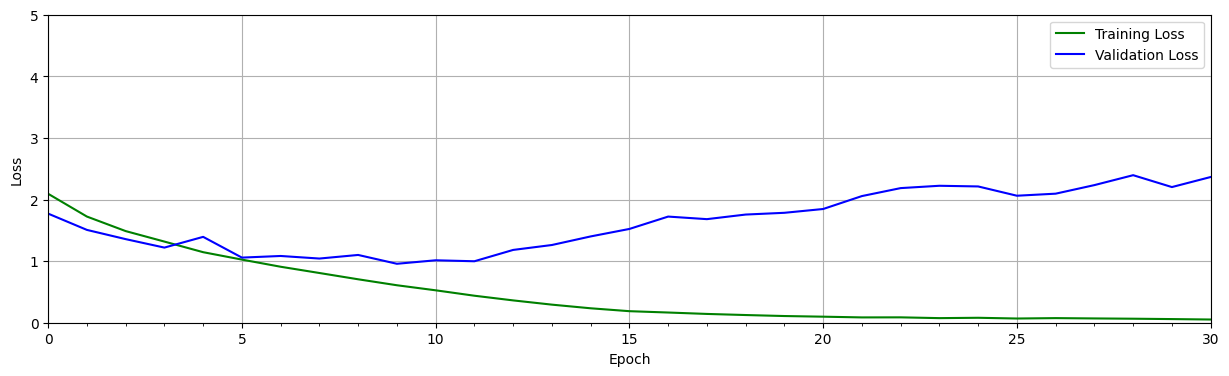

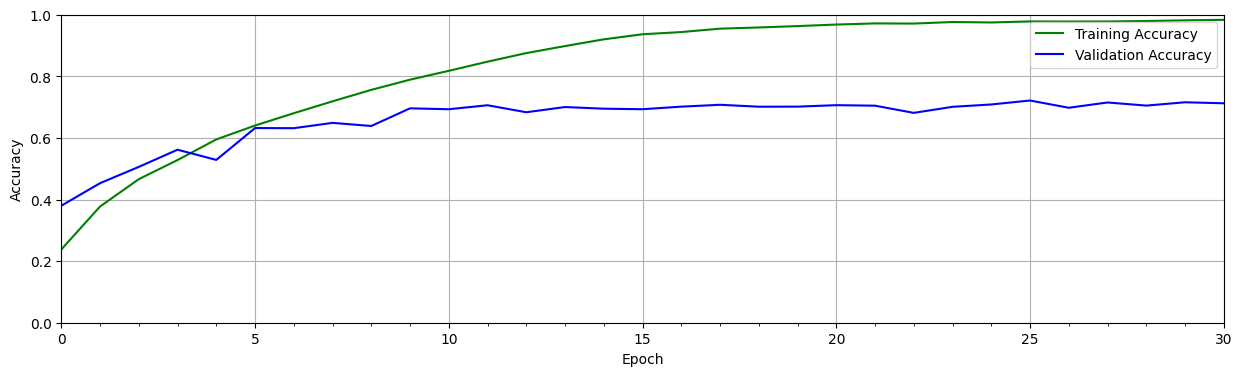

In [13]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

## Result
- Results from the baseline model indicate signs of overfitting.

- Validation loss starts increasing after around 10 epochs, while training loss continues to decrease.

- This suggests the model fits the training data well but does not generalize effectively to unseen test data.

- The accuracy plot mirrors this behavior—validation accuracy plateaus while training accuracy continues rising toward 100%.

- Overfitting is common in neural networks and may stem from:

 - The model memorizing specific patterns in the training data.

 - A relatively small training dataset, making it easier for the model to overfit.

## TODO
Adding Dropout to avoid overfitting